2023-07-05 19:51:06.599875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 66.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('nl_core_news_sm')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Error loading pos_tag: Package 'pos_tag' not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


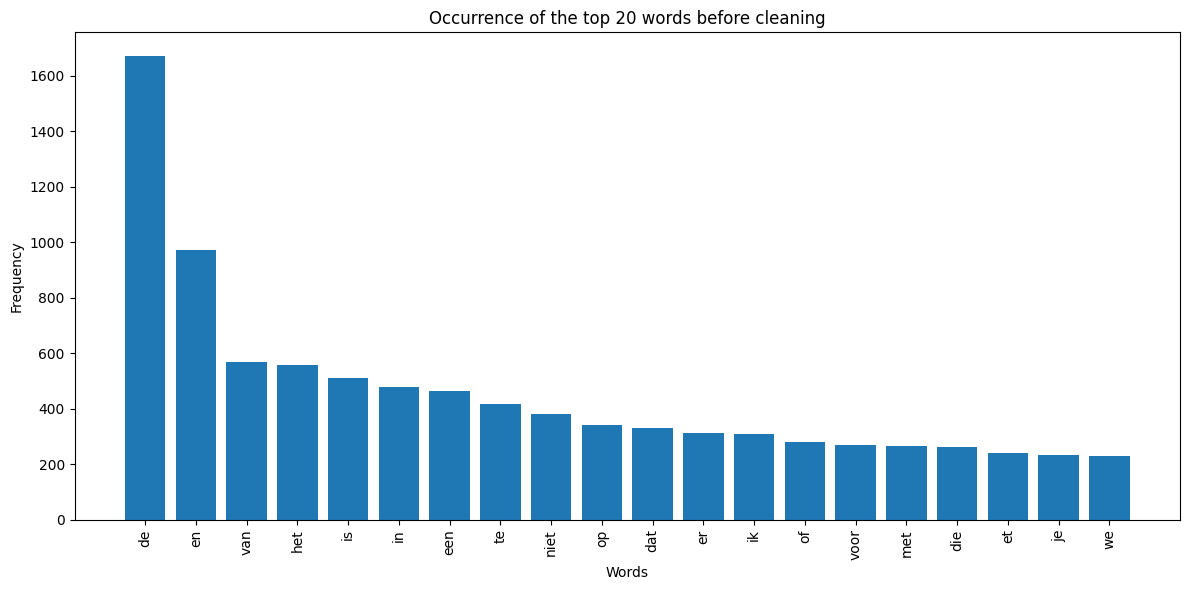

Maximum length of 'Antwoord' column: 2810.0
Mean length of 'Antwoord' column: 158.02766179540708
Count of 'nee': 90
Count of 'niks': 10
Count of 'nvt': 1
Count of 'nan': 41
Count of 'bedrijf': 341
Count of 'neen': 30
Total: 82


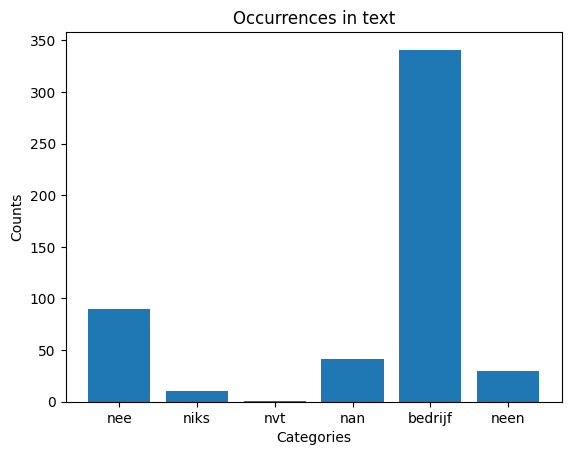

,Vraag,Antwoord,lemmatized_words,cleanned_text
0,Zijn er andere thema's en onderwerpen waarover...,"Nee, informatievoorziening prima op orde","[Nee, ,, informatievoorziening, prima, op, orde]","[informatievoorziening, prima, orde]"
1,Zijn er andere thema's en onderwerpen waarover...,Neen,[Neen],[]
2,Zijn er andere thema's en onderwerpen waarover...,Aanbestedingen en onderhoudscontracten. Het pe...,"[Aanbestedingen, en, onderhoudscontracten, ., ...","[aanbestedingen, onderhoudscontracten, persone..."
3,Zijn er andere thema's en onderwerpen waarover...,geen andere them's,"[geen, andere, them, 's]",[them]
4,Zijn er andere thema's en onderwerpen waarover...,Nee,[Nee],[]
5,Zijn er andere thema's en onderwerpen waarover...,Geen andere thema's en onderwerpen,"[Geen, andere, thema, 's, en, onderwerpen]","[thema, onderwerpen]"
6,Zijn er andere thema's en onderwerpen waarover...,Werkvoorraad,[Werkvoorraad],[werkvoorraad]
7,Zijn er andere thema's en onderwerpen waarover...,Waar staat *Bedrijf* over 2 of 3 jaar?,"[Waar, staat, *, Bedrijf, *, over, 2, of, 3, j...","[staat, jaar]"
8,Zijn er andere thema's en onderwerpen waarover...,Nee,[Nee],[]
9,Zijn er andere thema's en onderwerpen waarover...,Ik krijg voldoende informatie om mijn werk opt...,"[Ik, krijg, voldoende, informatie, om, mijn, w...","[krijg, voldoende, informatie, werk, optimaal,..."


In [7]:

!pip install emoji
!pip install spacy
!python -m spacy download nl_core_news_sm
!pip install stopwordsiso
!pip install langdetect

import string
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('pos_tag')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

import spacy
from spacy.symbols import nsubj, VERB, ADJ
nlp = spacy.load("nl_core_news_sm")

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim import corpora, models
from gensim.models import Phrases
from gensim.corpora import Dictionary

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn import cluster

from stopwordsiso import stopwords

from langdetect import detect

import emoji
import pandas as pd

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

# Read the Excel file
df = pd.read_excel("/content/Scorius_groot_1.xlsx")

# Calculate the frequency of words
word_frequency = {}

# Iterate over each row in the 'Antwoord' column
for row in df['Antwoord']:
    # Check if the row is not NaN
    if isinstance(row, str):
        # Iterate over each word in the row
        for word in row.split():
            # Update the frequency count for the word
            if word in word_frequency:
                word_frequency[word] += 1
            else:
                word_frequency[word] = 1

# Create lists to store the words and their frequencies
words = []
frequencies = []

# Sort the word frequencies in descending order
sorted_word_frequency = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

# Extract the top 20 sorted words and frequencies into separate lists
top_20_words = sorted_word_frequency[:20]
for word, frequency in top_20_words:
    words.append(word)
    frequencies.append(frequency)

# Increase the figure size
plt.figure(figsize=(12, 6))

# Create a bar chart for the top 20 words
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')
plt.title('Occurrence of the top 20 words before cleaning')
plt.tight_layout()
plt.show()


# Print maximum lenght of answers
max_length = df["Antwoord"].str.len().max()
print("Maximum length of 'Antwoord' column:", max_length)

# Print mean lenght of answers
mean_length = df["Antwoord"].str.len().mean()
print("Mean length of 'Antwoord' column:", mean_length)


# Define the column to check the language
column_to_check = "Antwoord"

# Iterate over the rows and detect the language in the specified column
rows_to_drop = []
for index, row in df.iterrows():
    try:
        text = str(row[column_to_check])
        language = detect(text)
        if language != 'nl':
            rows_to_drop.append(index)
    except:
        continue

# Drop the rows that have non-Dutch language
df.drop(rows_to_drop, axis=0, inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Convert the 'Antwoord' column to string type
df["Antwoord"] = df["Antwoord"].astype(str)

# Tokenize the text into individual words for each row
tokens = df['Antwoord'].apply(nltk.word_tokenize)

# Initializes the WordNet Lemmatizer from the NLTK library
lemmatizer = nltk.stem.WordNetLemmatizer()

# Lemmatize each word in the tokens for each row
df['lemmatized_words'] = tokens.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Convert the lists of words to lowercase
df['cleanned_text'] = df['lemmatized_words'].apply(lambda x: [word.lower() for word in x])

# Removing digits
df['cleanned_text'] = df['cleanned_text'].apply(lambda x: [word for word in x if not word.isdigit()])

# Removing punctuations
df['cleanned_text'] = df['cleanned_text'].apply(lambda x: [word.translate(str.maketrans('', '', string.punctuation)) for word in x])

# Remove emojis using the emoji library
df['cleanned_text'] = df['cleanned_text'].apply(lambda x: [emoji.demojize(word, delimiters=(":", ": ")) for word in x])

# Remove emoji descriptions
df['cleanned_text'] = df['cleanned_text'].apply(lambda x: [word for word in x if not word.startswith(':')])

# Remove words with less than 3 letters
df['cleanned_text'] = df['cleanned_text'].apply(lambda x: [word for word in x if len(word) >= 3])

# Replace empty strings with 'nan' in the 'cleanned_text' column
df['cleanned_text'] = df['cleanned_text'].apply(lambda row: ['nan'] if len(row) == 0 else row)

# Count occurrences of "nee","niks" "nvt" in the 'cleanned_text' column
nee_count = df['cleanned_text'].apply(lambda x: x.count('nee')).sum()
niks_count = df['cleanned_text'].apply(lambda x: x.count('niks')).sum()
nvt_count = df['cleanned_text'].apply(lambda x: x.count('nvt')).sum()
nan_count = df['cleanned_text'].apply(lambda x: x.count('nan')).sum()
bedrijf_count = df['cleanned_text'].apply(lambda x: x.count('bedrijf')).sum()
neen_count = df['cleanned_text'].apply(lambda x: x.count('neen')).sum()

# Print the counts
print("Count of 'nee':", nee_count)
print("Count of 'niks':", niks_count)
print("Count of 'nvt':", nvt_count)
print("Count of 'nan':", nan_count)
print("Count of 'bedrijf':", bedrijf_count)
print("Count of 'neen':", neen_count)
print("Total:", neen_count+niks_count+nvt_count+nan_count)

# Create a bar chart
labels = ['nee', 'niks', 'nvt', 'nan', 'bedrijf','neen']
counts = [nee_count, niks_count, nvt_count, nan_count, bedrijf_count, neen_count]
plt.bar(labels, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Occurrences in text')

# Show the bar chart
plt.show()

from stopwordsiso import stopwords

# Define additional stopwords to be added
additional_stopwords = ['nee', 'niks', 'nvt', 'nan', 'bedrijf', 'neen']

# Initialize the stopwordsiso for Dutch
stopwords_dutch_extended = stopwords("nl")

# Extend the stopwords list
stopwords_dutch_extended.update(additional_stopwords)

# Remove stopwords
df['cleanned_text'] = df['cleanned_text'].apply(lambda x: [word for word in x if word not in stopwords_dutch_extended])

# Strip whitespaces
df['cleanned_text'] = df['cleanned_text'].apply(lambda x: [word.strip() for word in x])

df.head(10)



#LDA all word combinations model

[0.49783631564926595, 0.48298703699854934, 0.48950401817845757, 0.47110578576649065, 0.4799407197230098, 0.47539762484856435, 0.4623539607971023, 0.4579749546688664, 0.4689305048801792, 0.456584018373681, 0.4552260816186422, 0.44550630342171293, 0.44776431122094207, 0.4449267901294906, 0.4409245641305278, 0.43875164907574266, 0.4342950317595661, 0.4383327254203082, 0.4318931546022716, 0.43086570271940927]


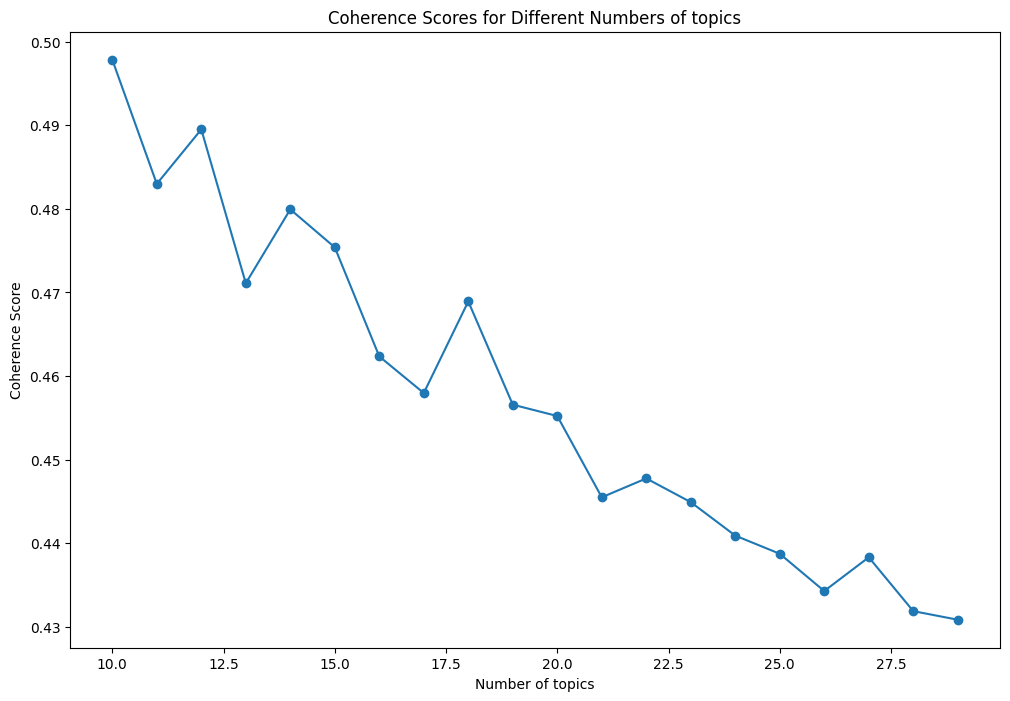

In [8]:
# dataset for the unigrams all word combinations
uni_all = df

# Set the number of runs to obtain an average coherence score
runs = 10

# Create a dictionary
id2word = corpora.Dictionary(uni_all['cleanned_text'])

# Filter out words that occur in less than 5 documents or more than 20% of the documents
id2word.filter_extremes(no_below=5, no_above=0.2)

# Create a corpus
corpus = [id2word.doc2bow(doc) for doc in uni_all['cleanned_text']]

# Set the range of cluster numbers to evaluate
cluster_range = range(10, 30)

coherence_scores = []
avg_coherence_scores = []  # List to store average coherence scores
models = []

# Calculate coherence scores for each cluster number
for num_clusters in cluster_range:
    random.seed(42)
    model_coherences = []
    for _ in range(runs):
        # Initialize the LDA model with
        model = LdaModel(corpus=corpus, num_topics=num_clusters)

        # Calculate the coherence score of the model
        coherencemodel = CoherenceModel(model=model, texts=uni_all['cleanned_text'], dictionary=id2word, coherence='c_v')
        coherence_scores.append(coherencemodel.get_coherence())

        # Calculate coherence per run
        model_coherences.append(coherencemodel.get_coherence())

    # Calculate average coherence
    avg_coherence = sum(model_coherences) / runs

    # Append average coherence to separate list
    avg_coherence_scores.append(avg_coherence)
    models.append(model)

print(avg_coherence_scores)

# Visualize the coherence scores in a plot
plt.figure(figsize=(12, 8))
plt.plot(cluster_range, avg_coherence_scores, marker='o')
plt.xlabel("Number of topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of topics")
plt.show()

##Grid research for the alpha and eta

In [16]:
# Define the alpha and eta values to evaluate
alpha_range = [0.01, 0.05, 0.1, 0.5,1 ,5]
eta_range = [0.01, 0.05, 0.1, 0.5, 1, 5]

best_coherence = -1.0
best_alpha = None
best_eta = None

# Iterate over all combinations of alpha and eta
for alpha in alpha_range:
    for eta in eta_range:
        model = LdaModel(corpus=corpus, num_topics=10, id2word=id2word, alpha=alpha, eta=eta)
        coherence_model = CoherenceModel(model=model, texts=uni_all['cleanned_text'], dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        print("Alpha:", alpha, "Eta:", eta, "Coherence Score:", coherence_score)

        # Check if this is the best coherence score so far
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_alpha = alpha
            best_eta = eta

# Print the best coherence score and corresponding alpha and eta values
print("Best Coherence Score:", best_coherence)
print("Best Alpha:", best_alpha)
print("Best Eta:", best_eta)

Alpha: 0.01 Eta: 0.01 Coherence Score: 0.5235986361114227


Alpha: 0.01 Eta: 0.05 Coherence Score: 0.4934856697330285


Alpha: 0.01 Eta: 0.1 Coherence Score: 0.499242965835354


Alpha: 0.01 Eta: 0.5 Coherence Score: 0.4953230148983409


Alpha: 0.01 Eta: 1 Coherence Score: 0.5069765779393075


Alpha: 0.01 Eta: 5 Coherence Score: 0.48974776228158284


Alpha: 0.05 Eta: 0.01 Coherence Score: 0.5155643997072354


Alpha: 0.05 Eta: 0.05 Coherence Score: 0.5141749689177926


Alpha: 0.05 Eta: 0.1 Coherence Score: 0.46322056784831733


Alpha: 0.05 Eta: 0.5 Coherence Score: 0.49354493190624743


Alpha: 0.05 Eta: 1 Coherence Score: 0.5070779004723277


Alpha: 0.05 Eta: 5 Coherence Score: 0.4915492196757884


Alpha: 0.1 Eta: 0.01 Coherence Score: 0.5013555804975608


Alpha: 0.1 Eta: 0.05 Coherence Score: 0.48512670341451763


Alpha: 0.1 Eta: 0.1 Coherence Score: 0.4962175386298366


Alpha: 0.1 Eta: 0.5 Coherence Score: 0.4841688356597782


Alpha: 0.1 Eta: 1 Coherence Score: 0.46133685041140426


Alpha: 0.1 Eta: 5 Coherence Score: 0.4877482996059916


Alpha: 0.5 Eta: 0.01 Coherence Score: 0.582470433799591


Alpha: 0.5 Eta: 0.05 Coherence Score: 0.5995565790926225


Alpha: 0.5 Eta: 0.1 Coherence Score: 0.594720239932635


Alpha: 0.5 Eta: 0.5 Coherence Score: 0.5961564341195159


Alpha: 0.5 Eta: 1 Coherence Score: 0.585361833977057


Alpha: 0.5 Eta: 5 Coherence Score: 0.6082601714607708


Alpha: 1 Eta: 0.01 Coherence Score: 0.6061362865100793


Alpha: 1 Eta: 0.05 Coherence Score: 0.6321550652432466


Alpha: 1 Eta: 0.1 Coherence Score: 0.6135909068943993


Alpha: 1 Eta: 0.5 Coherence Score: 0.6278112832537202


Alpha: 1 Eta: 1 Coherence Score: 0.6297265997092774


Alpha: 1 Eta: 5 Coherence Score: 0.6226555854802852


Alpha: 5 Eta: 0.01 Coherence Score: 0.6270900309917874


Alpha: 5 Eta: 0.05 Coherence Score: 0.6324285593277174


Alpha: 5 Eta: 0.1 Coherence Score: 0.6347638077571968


Alpha: 5 Eta: 0.5 Coherence Score: 0.643968336518993


Alpha: 5 Eta: 1 Coherence Score: 0.6284673195147812
Alpha: 5 Eta: 5 Coherence Score: 0.6373675490875699
Best Coherence Score: 0.643968336518993
Best Alpha: 5
Best Eta: 0.5


## LDA model with the optimal number of topics, alpha and eta

In [12]:
# Initialize the alpha and eta
alpha = 0.1
eta = 0.1

# Initialize the LDA model with specified parameters
model = LdaModel(corpus=corpus, num_topics=10,id2word=id2word, alpha=alpha, eta=eta)

# Calculate the coherence score of the model
coherence_model = CoherenceModel(model=model, texts=uni_all['cleanned_text'], dictionary=id2word, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Print the coherence score of the model
print("Coherence Score:", coherence_score)

Coherence Score: 0.4966515334766318


In [13]:
# Number op topic with the highest coherence value
N_TOPICS = 10

# Getting words with the highest probability for the each topic
for topic in range(N_TOPICS):
    words = model.show_topic(topic, 10)
    topic_n_words = ' '.join([word[0] for word in words])
    print('Topic {}: {}'.format(str(topic), topic_n_words))

Topic 0: info medewerkers projecten afdeling organisatie beter uitleg graag zaken dag
Topic 1: vind werk afdeling collega organisatie teamleider goed projecten elkaar sector
Topic 2: werk goed nieuwe werken organisatie collega mensen bezig team mee
Topic 3: team medewerkers werk jaar idee projecten nieuwe vind toekomst beter
Topic 4: werken werk functie goed steed komen vragen collega duidelijk mensen
Topic 5: projecten klanten collega medewerkers beter werk afdeling echt nieuwe krijgen
Topic 6: informatie gaan projecten goed gedaan vraag mensen sector voldoende plaats
Topic 7: nieuwe gaan goede werken mee goed zaken leidinggevende dingen medewerkers
Topic 8: collega personeel werk gaan nieuwe samenwerking communicatie graag jaar onderwerpen
Topic 9: gaat plaats graag werken organisatie mee afdeling kennis goed management


In [14]:
# Print the words with probabilities for each topic
model.print_topics()

[(0,
  '0.027*"info" + 0.018*"medewerkers" + 0.016*"projecten" + 0.015*"afdeling" + 0.014*"organisatie" + 0.013*"beter" + 0.011*"uitleg" + 0.011*"graag" + 0.011*"zaken" + 0.010*"dag"'),
 (1,
  '0.024*"vind" + 0.023*"werk" + 0.020*"afdeling" + 0.019*"collega" + 0.015*"organisatie" + 0.014*"teamleider" + 0.012*"goed" + 0.012*"projecten" + 0.011*"elkaar" + 0.011*"sector"'),
 (2,
  '0.022*"werk" + 0.021*"goed" + 0.020*"nieuwe" + 0.015*"werken" + 0.015*"organisatie" + 0.014*"collega" + 0.013*"mensen" + 0.012*"bezig" + 0.011*"team" + 0.011*"mee"'),
 (3,
  '0.031*"team" + 0.015*"medewerkers" + 0.015*"werk" + 0.015*"jaar" + 0.014*"idee" + 0.012*"projecten" + 0.012*"nieuwe" + 0.010*"vind" + 0.010*"toekomst" + 0.010*"beter"'),
 (4,
  '0.026*"werken" + 0.020*"werk" + 0.019*"functie" + 0.018*"goed" + 0.014*"steed" + 0.013*"komen" + 0.013*"vragen" + 0.012*"collega" + 0.012*"duidelijk" + 0.010*"mensen"'),
 (5,
  '0.025*"projecten" + 0.019*"klanten" + 0.018*"collega" + 0.016*"medewerkers" + 0.012*"be